# Approach
I am not sure where to begin from so I started by plotting one fearture for all 11 lectures. I am plotting a box and whisker plot. i started with the first feature and then decided to plot the 8th feature This is done in order to see if somehow the lectures depend on the features and if the features can be used to identify what lecture is the data from. 

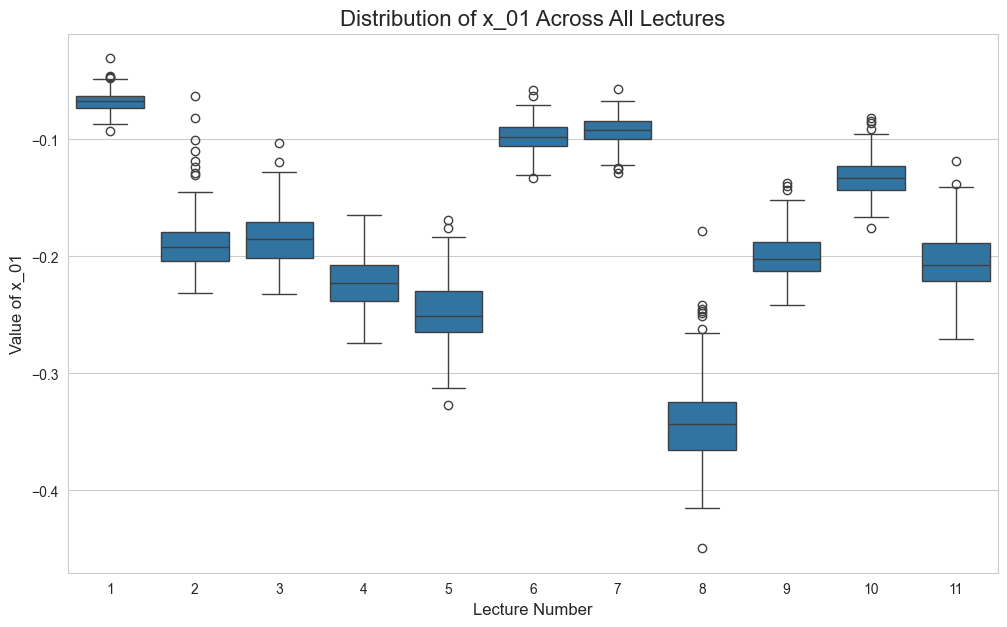

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The exact name of your file
filename = "data-v5-2025-09-19.csv"

feature_to_plot = 'x_01'

try:
    # Load the dataset
    df = pd.read_csv(filename)

    # Check if the required columns exist
    if 'Lecture' not in df.columns or feature_to_plot not in df.columns:
        print(f"Error: Could not find 'Lecture' or '{feature_to_plot}' columns.")
        print(f"Available columns are: {list(df.columns)}")
    else:
        # Set the plotting style
        sns.set_style("whitegrid")

        # Create the figure
        plt.figure(figsize=(12, 7))

        # Create the boxplot
        sns.boxplot(
            data=df,
            x='Lecture',
            y=feature_to_plot
        )
        
        # Set title and labels
        plt.title(f'Distribution of {feature_to_plot} Across All Lectures', fontsize=16)
        plt.xlabel('Lecture Number', fontsize=12)
        plt.ylabel(f'Value of {feature_to_plot}', fontsize=12)
        
        # Improve x-axis labels to make sure all 11 lectures are shown clearly
        if df['Lecture'].nunique() <= 11:
            plt.xticks(ticks=range(df['Lecture'].nunique()), labels=sorted(df['Lecture'].unique()))
        
        plt.show()

except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found.")
    print("Please make sure the file is in the same directory as your Python script.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

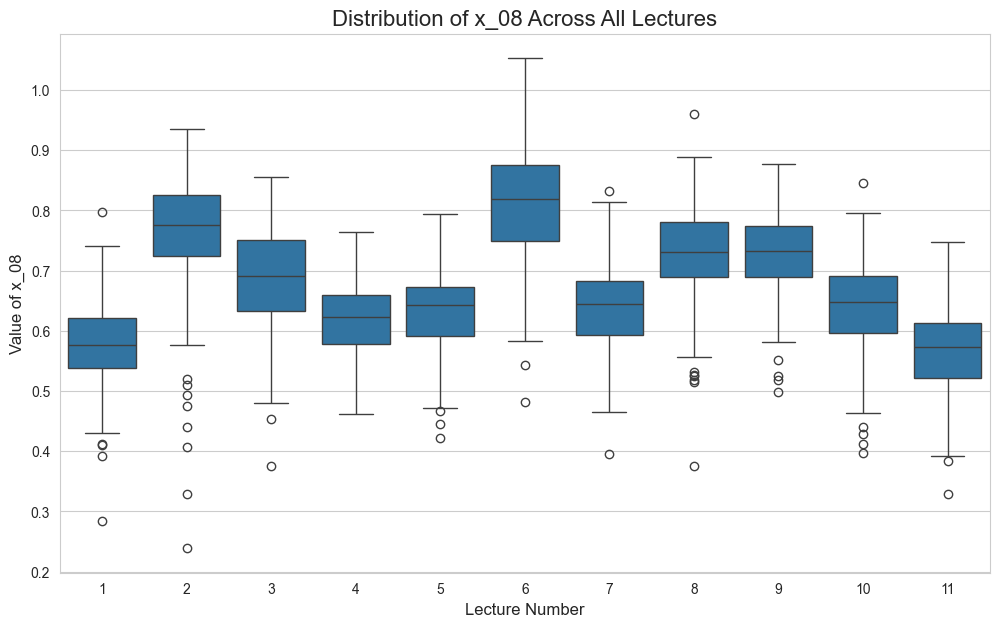

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The exact name of your file
filename = "data-v5-2025-09-19.csv"
feature_to_plot = 'x_08'

try:
    # Load the dataset
    df = pd.read_csv(filename)

    # Check if the required columns exist
    if 'Lecture' not in df.columns or feature_to_plot not in df.columns:
        print(f"Error: Could not find 'Lecture' or '{feature_to_plot}' columns.")
        print(f"Available columns are: {list(df.columns)}")
    else:
        # Set the plotting style
        sns.set_style("whitegrid")

        # Create the figure
        plt.figure(figsize=(12, 7))

        # Create the boxplot
        sns.boxplot(
            data=df,
            x='Lecture',
            y=feature_to_plot
        )
        
        # Set title and labels
        plt.title(f'Distribution of {feature_to_plot} Across All Lectures', fontsize=16)
        plt.xlabel('Lecture Number', fontsize=12)
        plt.ylabel(f'Value of {feature_to_plot}', fontsize=12)
        
        # Improve x-axis labels to make sure all 11 lectures are shown clearly
        if df['Lecture'].nunique() <= 11:
            plt.xticks(ticks=range(df['Lecture'].nunique()), labels=sorted(df['Lecture'].unique()))
        
        plt.show()

except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found.")
    print("Please make sure the file is in the same directory as your Python script.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## Analysis
I have plotted two features for the 11 lectures so far, and there seems to be a lot of outliers (the dots) for every lecture (especially lecture 2) for both the features and while there seems to be some sort of correlation between the features and the lectures, the number of outliers is making the plot not so reliable and the correlation not that strong to trust on. Also there seems to be no trend betweent the features and the lectures.

## Next step
I will give this one last shot by trying to find if theres a correlation between the feature values and the lecture number. The code below tries to figure that out and gives a F statstic and p value which tells. A high f statistic would mean that the differences between the lectures are much larger than the random spread within them and that the lectures have a real affect on the feature values. It then gives the top 10 features with the largest F statistic.

In [10]:
import pandas as pd
from scipy.stats import f_oneway

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'

# --- Main Script ---
try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # Identify the feature columns (those starting with 'x_')
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    
    # Store the results
    results = []

    # Loop through each feature column to perform the ANOVA test
    for feature in feature_columns:
        # Create a list of data series, one for each lecture group
        # e.g., [lecture1_data, lecture2_data, lecture3_data, ...]
        groups = [df[feature][df['Lecture'] == i] for i in df['Lecture'].unique()]
        
        # Perform the one-way ANOVA test
        f_stat, p_value = f_oneway(*groups)
        
        # Store the feature name, F-statistic, and p-value
        results.append({'feature': feature, 'f_statistic': f_stat, 'p_value': p_value})

    # Convert the results to a DataFrame and sort by p-value (ascending)
    results_df = pd.DataFrame(results)
    results_df_sorted = results_df.sort_values(by='p_value', ascending=True)

    # Display the top 10 most significant features
    print("Top 10 Features Most Correlated with Lectures (based on p-value):")
    print(results_df_sorted.head(10))

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure this script is in the same directory as your data file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Top 10 Features Most Correlated with Lectures (based on p-value):
   feature  f_statistic  p_value
0     x_01  1710.071177      0.0
69    x_70   494.132616      0.0
68    x_69   385.725821      0.0
67    x_68  1303.931646      0.0
66    x_67  2553.082876      0.0
65    x_66   413.492090      0.0
64    x_65   281.629703      0.0
63    x_64  3325.322228      0.0
62    x_63  8744.751634      0.0
61    x_62  4976.978145      0.0


## Analysis
x_01 surprisingly (which is also the feature i plotted above) seems to be in the top 10 features. This means that my assumption that the feature does not depend on lecture is clearly wrong. This shows that the features values do have some correlation with the lecture numbers and the almost 0 p values is also an indicator that this realtion is statistically singificant and is not random, but since I dont have information about what the fetures actually mean, I dont think I can analyse this futher. 

## Next step
I am curious to see if the number of words is related to the submission delay so I shall plot that data (this was again a very random shot in the air to see if i get some relation)

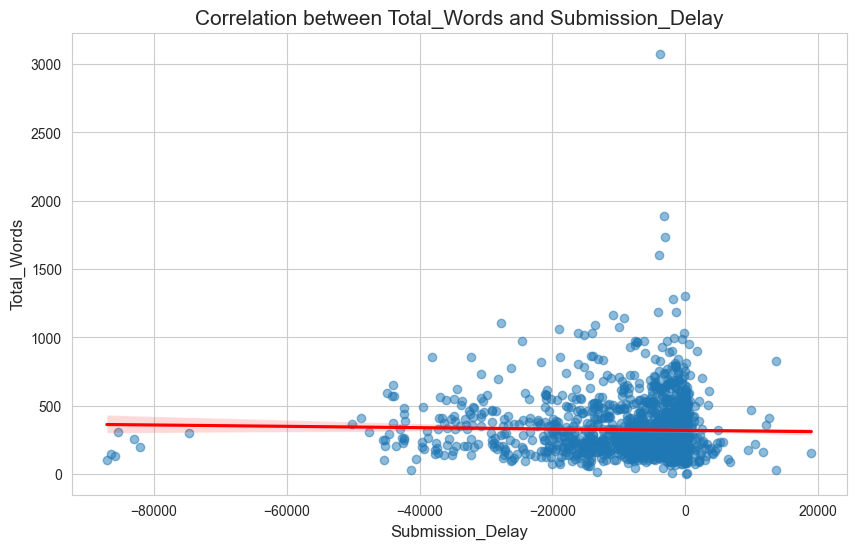

Pearson Correlation Coefficient: -0.0259
P-value: 0.2973


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# --- Configuration: Please update these variable names ---
file_name = 'data-v5-2025-09-19.csv'

# Replace 'submission_delay' with the exact column name for submission delay
delay_column_name = 'Submission_Delay' 

# Replace 'number_of_words' with the exact column name for word count
words_column_name = 'Total_Words' 
# ---

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # --- Create the Scatter Plot ---
    plt.figure(figsize=(10, 6))
    
    # regplot is a scatter plot with a regression line to show the trend
    sns.regplot(x=delay_column_name, y=words_column_name, data=df,
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    plt.title(f'Correlation between {words_column_name} and {delay_column_name}', fontsize=15)
    plt.xlabel(delay_column_name, fontsize=12)
    plt.ylabel(words_column_name, fontsize=12)
    plt.grid(True)
    plt.show()

    # --- Calculate the Correlation Coefficient ---
    # Drop any rows with missing values in these columns to avoid errors
    clean_df = df.dropna(subset=[delay_column_name, words_column_name])
    
    corr_coefficient, p_value = pearsonr(clean_df[delay_column_name], clean_df[words_column_name])

    print(f"Pearson Correlation Coefficient: {corr_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")

except (FileNotFoundError, KeyError) as e:
    print(f"An error occurred: {e}")
    print("\nPlease make sure the file name and column names are spelled correctly in the script.")

## Analysis
It is clear that there is no linear realtionship between the two variables. The Pearson Coefficent value is also close to 0 which means that there is very weak to non existent linear correlation. And since the p value is greater than 0.05 it means that the data is not statistically significant. 

## Next step
Now I thought that maybe the 100 features can be helped to classify student types and personalities, that is on the basis of what the values of the fearuers are maybe we can group how different stuednts approach the assignemnt and sumbit responses. So here i am using the K-Means algorithm to identify clusters.

Calculating inertia for different values of k...


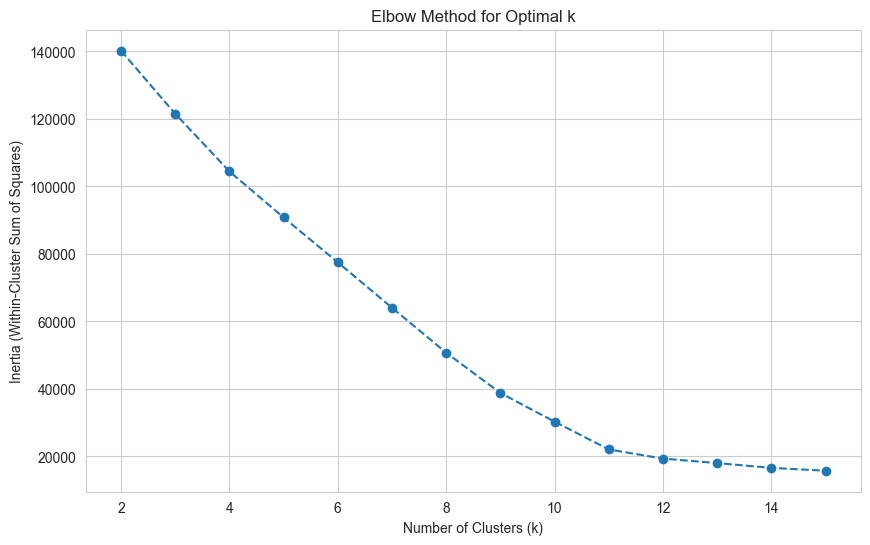


Running K-Means with k=12...

Analysis of Clusters:
Number of students in each cluster:
cluster
3     165
4     162
0     155
1     152
2     152
5     138
11    135
9     126
10    122
8     121
7     119
6      71
Name: count, dtype: int64

Average feature values for each cluster (Cluster Profiles):
cluster        0         1         2         3         4         5         6   \
x_01    -0.187212 -0.251700 -0.097150 -0.192590 -0.222264 -0.092905 -0.122130   
x_02     0.200374  0.273767  0.349628  0.292147  0.257248  0.182460  0.167355   
x_03     0.187428  0.128193  0.031493 -0.034926  0.062997  0.125509  0.052170   
x_04     0.129298 -0.123766 -0.047550  0.023957  0.090016  0.133405  0.017712   
x_05     0.002366  0.158651  0.210960  0.074110  0.050875  0.105654  0.054175   
...           ...       ...       ...       ...       ...       ...       ...   
x_96     0.365418  0.393600  0.367152  0.330958  0.448197  0.358050  0.229939   
x_97     0.153710  0.084195  0.171077  0.052511 

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # Select only the feature columns (x_01 to x_100) for clustering
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    features_df = df[feature_columns]

    # --- Step 1: Scale the Data ---
    # This is essential for K-Means to work correctly
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_df)

    # --- Step 2: Find the Optimal 'k' with the Elbow Method ---
    inertia_values = []
    k_range = range(2, 16)

    print("Calculating inertia for different values of k...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        inertia_values.append(kmeans.inertia_)
    
    # Plot the Elbow Method graph
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_values, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    optimal_k = 12  # <-- CHANGE THIS VALUE based on your elbow plot

    print(f"\nRunning K-Means with k={optimal_k}...")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)

    # Add the cluster labels back to the original DataFrame
    df['cluster'] = kmeans.labels_

    # --- Step 4: Analyze the Clusters ---
    print("\nAnalysis of Clusters:")
    print(f"Number of students in each cluster:")
    print(df['cluster'].value_counts())

    # Calculate the average value of each feature for each cluster
    cluster_analysis = df.groupby('cluster')[feature_columns].mean()

    print("\nAverage feature values for each cluster (Cluster Profiles):")
    # Using .T transposes the table for better readability
    print(cluster_analysis.T)

    print("Most Defining Features for Each Cluster:\n")

    # This loop goes through each cluster (0, 1, 2, 3, 4)
    for cluster_id in cluster_analysis.index:
        # Select the data for the current cluster
        cluster_profile = cluster_analysis.loc[cluster_id]
        
        # Find the max value and its corresponding feature name
        max_feature_name = cluster_profile.idxmax()
        max_feature_value = cluster_profile.max()
        
        # Find the min value and its corresponding feature name
        min_feature_name = cluster_profile.idxmin()
        min_feature_value = cluster_profile.min()
        
        # Print the results in a formatted way
        print(f"--- Cluster {cluster_id} ---")
        print(f"  Highest Value Feature: '{max_feature_name}' (Value: {max_feature_value:.2f})")
        print(f"  Lowest Value Feature:  '{min_feature_name}' (Value: {min_feature_value:.2f})")
        print()
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print

## Analysis
k=12 seems to be a good value since the elbow curve becomes stable araound that value. However the highest value features seem to be not that high for all clusters and for some strange reason x_08 feature seems to dominate all the 12 clusters which is very weird. This means that the feature is being very dominant amogntsh all data points and since K-means is a distance calulating algortithhm maybe the high values of x_08 are creating an issue with the algorithm's result, and hence I could not conclusivley find clusters/ student personality types through this attempt.

## Next step
So i tried to use the heirarchal classification model instead.

Performing hierarchical clustering... (This may take a moment)


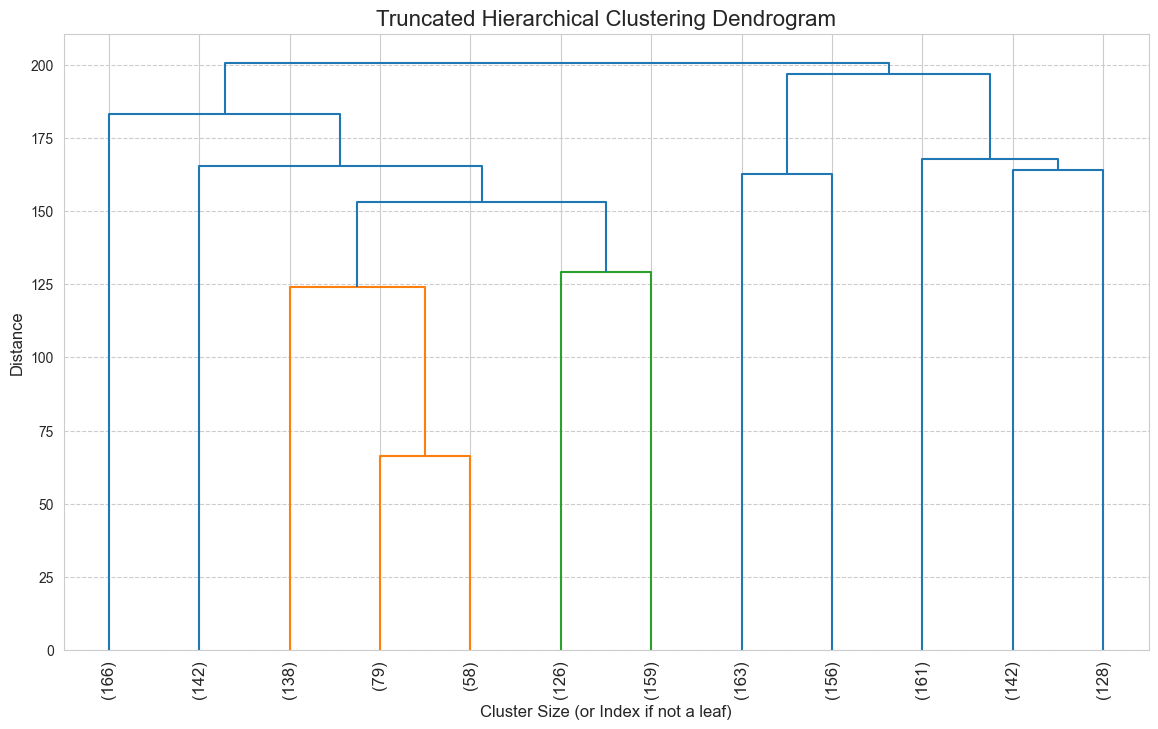

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # Select only the feature columns for clustering
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    features_df = df[feature_columns]

    # --- Step 1: Scale the Data ---
    # This is essential as hierarchical clustering is distance-based
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_df)

    # --- Step 2: Perform Hierarchical Clustering ---
    # The 'ward' linkage method minimizes the variance within each cluster
    # It's a good default choice.
    print("Performing hierarchical clustering... (This may take a moment)")
    linked = linkage(scaled_features, method='ward')

    # --- Step 3: Visualize with a Truncated Dendrogram ---
    plt.figure(figsize=(14, 8))
    
    # We truncate the dendrogram to show the last 12 merged clusters ('p=12')
    # This keeps the plot clean and readable.
    dendrogram(linked,
               orientation='top',
               truncate_mode='lastp',  # Show only the last p merged clusters
               p=12,  # The number of final clusters to show
               show_leaf_counts=True,
               leaf_rotation=90.,
               leaf_font_size=12.)

    plt.title('Truncated Hierarchical Clustering Dendrogram', fontsize=16)
    plt.xlabel('Cluster Size (or Index if not a leaf)', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## Analysis
This also clustered in approcimately 12 clusters however the distance seem to be exteremely high which means the clusters are not proepr and I dont think that the data can be clustered fro conclusive results. I also tried to plot the same for the number of lectiures to see if the features indicate some sort of similaroitoes between the lectures


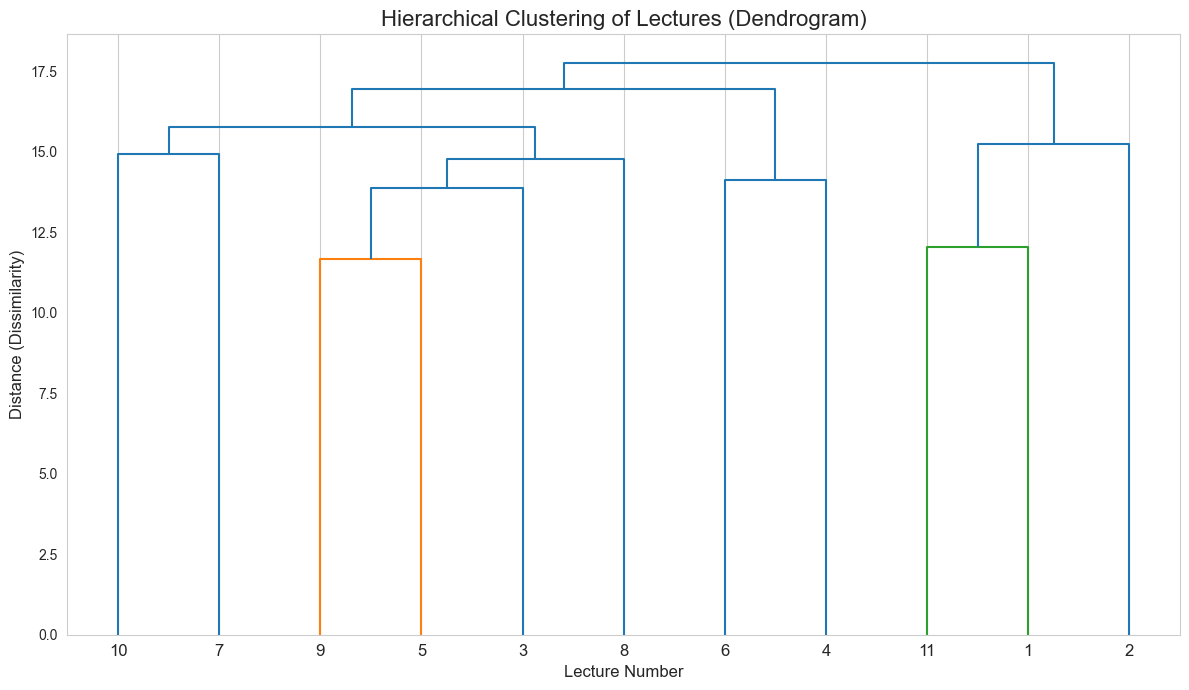

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # --- Step 1: Aggregate Data by Lecture ---
    # Group by the 'Lecture' column and calculate the mean for all feature columns
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    lecture_profiles = df.groupby('Lecture')[feature_columns].mean()

    # --- Step 2: Scale the Aggregated Data ---
    scaler = StandardScaler()
    scaled_lecture_profiles = scaler.fit_transform(lecture_profiles)

    # --- Step 3: Perform Hierarchical Clustering ---
    # The 'ward' method minimizes the variance within each cluster
    linked = linkage(scaled_lecture_profiles, method='ward')

    # --- Step 4: Visualize with a Dendrogram ---
    plt.figure(figsize=(12, 7))
    
    # The dendrogram shows the hierarchy of how lectures are clustered
    dendrogram(linked,
               orientation='top',
               labels=lecture_profiles.index.tolist(), # Use lecture numbers as labels
               distance_sort='descending')

    plt.title('Hierarchical Clustering of Lectures (Dendrogram)', fontsize=16)
    plt.xlabel('Lecture Number', fontsize=12)
    plt.ylabel('Distance (Dissimilarity)', fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## Analysis
The distance is again very high whicg means the features do not even help classifiy lectures togehter. 

## Next step
My last attempt is to find a feature that somehow relates to the number of words submitted.

In [26]:
import pandas as pd
from scipy.stats import pearsonr

file_name = 'data-v5-2025-09-19.csv'

# !!! IMPORTANT: Replace this with the actual column name for word count !!!
words_column_name = 'Total_Words'
# ---

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    # Identify the feature columns
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    
    # Store the results
    correlation_results = []

    # Check if the words column exists before proceeding
    if words_column_name not in df.columns:
        raise KeyError(f"The column '{words_column_name}' was not found in the file.")

    # Loop through each feature to calculate its correlation with the word count
    for feature in feature_columns:
        # Drop rows with missing values for the pair of columns to ensure valid calculation
        clean_df = df[[feature, words_column_name]].dropna()
        
        # Calculate Pearson correlation
        corr_coeff, p_value = pearsonr(clean_df[feature], clean_df[words_column_name])
        
        correlation_results.append({
            'feature': feature,
            'correlation_coefficient': corr_coeff,
            'p_value': p_value
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(correlation_results)
    
    # Add a column for the absolute correlation value for sorting
    results_df['abs_correlation'] = results_df['correlation_coefficient'].abs()
    
    # Sort by the absolute value to see the strongest correlations at the top
    results_df_sorted = results_df.sort_values(by='abs_correlation', ascending=False)

    # Display the top 10 most correlated features
    print(f"Top 10 Features Correlated with '{words_column_name}':")
    print(results_df_sorted[['feature', 'correlation_coefficient', 'p_value']].head(10))


except (FileNotFoundError, KeyError) as e:
    print(f"An error occurred: {e}")
    print("\nPlease make sure the file name and column names are spelled correctly.")

Top 10 Features Correlated with 'Total_Words':
   feature  correlation_coefficient       p_value
11    x_12                 0.136027  3.953848e-08
7     x_08                -0.119198  1.523532e-06
83    x_84                -0.107255  1.536386e-05
35    x_36                -0.102896  3.372352e-05
26    x_27                 0.102258  3.774042e-05
6     x_07                -0.100300  5.309611e-05
14    x_15                -0.099484  6.109992e-05
44    x_45                -0.096433  1.023220e-04
63    x_64                 0.094216  1.474765e-04
72    x_73                -0.093380  1.689191e-04


## Analysis
The p values are very small (much much smaller than 0.05) which means that there has to be a statistical relation betweent the data and its not ransom at all but the small values of the pearsons coefficents implies that the total number of words dont depend on any of the feature solely and even though there might be some sort of dependance (as suggested by the p values) no feature is strong enough to independantly predict the value of the total number of words. This motivates the use of a Random Forest Regressor to find what features most strongly contribute to the number of words in a non-linear and complex manner

Training the Random Forest model...


C:\Users\Radhika Agarwal\AppData\Local\Temp\ipykernel_10840\3860176202.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')


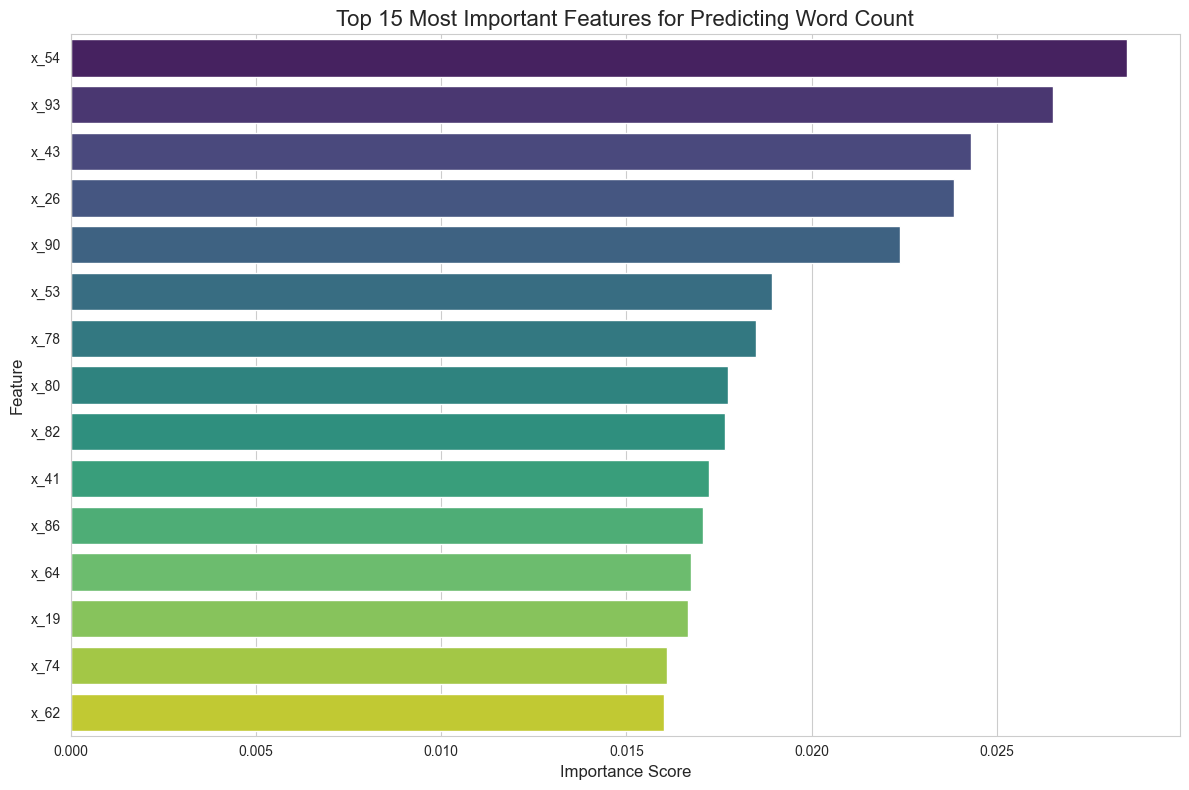

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'
words_column_name = 'Total_Words'
# ---

try:
    # Load the dataset and drop any rows with missing word counts
    df = pd.read_csv(file_name).dropna(subset=[words_column_name])

    # Define our features (X) and target (y)
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    X = df[feature_columns]
    y = df[words_column_name]

    # --- Train the Random Forest Model ---
    # n_estimators is the number of trees in the forest
    # random_state ensures the result is reproducible
    print("Training the Random Forest model...")
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y)

    # --- Extract and Visualize Feature Importances ---
    importances = model.feature_importances_
    
    # Create a DataFrame for easier visualization
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    # Plot the top 15 most important features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')
    
    plt.title('Top 15 Most Important Features for Predicting Word Count', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

except (FileNotFoundError, KeyError) as e:
    print(f"An error occurred: {e}")
    print("\nPlease make sure the file name and column names are spelled correctly.")

The single most influential feature is only contributing about 2.5% to the model's overall ability to predict the word count. The responsibility for the word count is highly distributed and there is no hero feature which is driving the outcome.

I will now **repeat** the same model analysis for the number of characters and the submission delay

Training the Random Forest model...


C:\Users\Radhika Agarwal\AppData\Local\Temp\ipykernel_10840\1481522144.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')


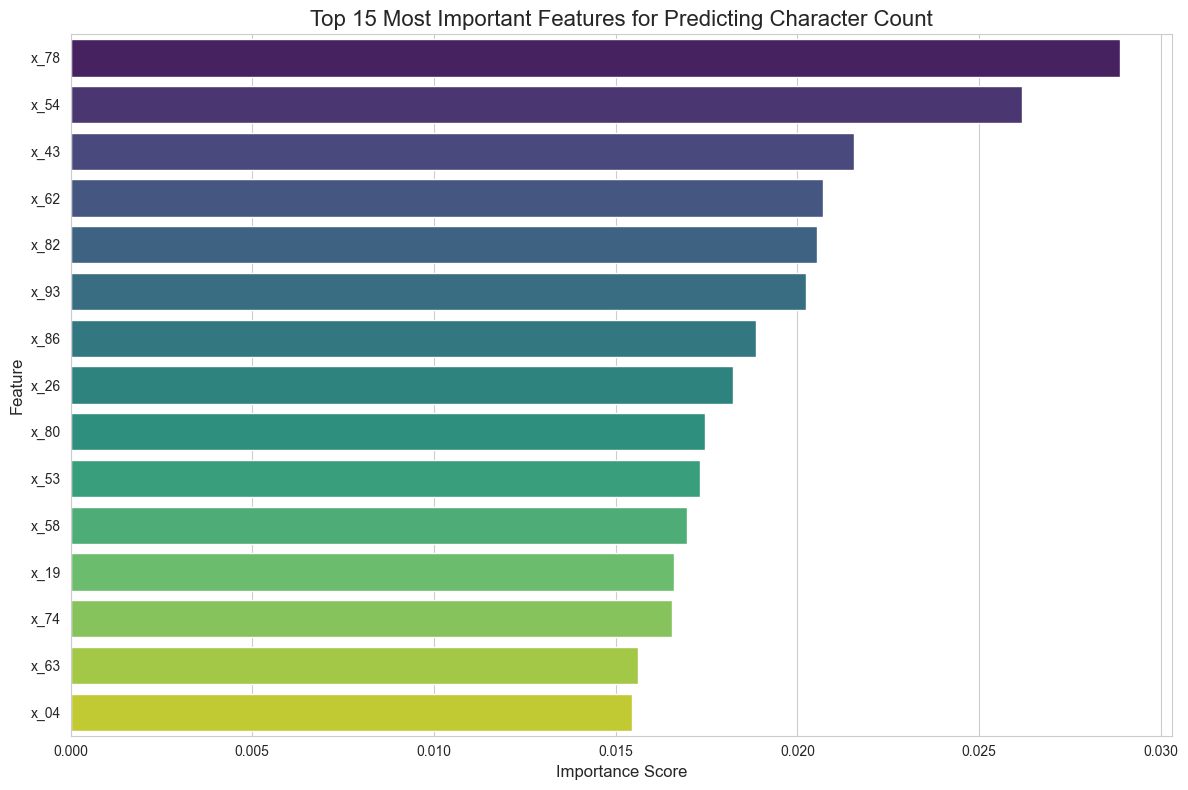

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'
words_column_name = 'Total_Characters'
# ---

try:
    # Load the dataset and drop any rows with missing word counts
    df = pd.read_csv(file_name).dropna(subset=[words_column_name])

    # Define our features (X) and target (y)
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    X = df[feature_columns]
    y = df[words_column_name]

    # --- Train the Random Forest Model ---
    # n_estimators is the number of trees in the forest
    # random_state ensures the result is reproducible
    print("Training the Random Forest model...")
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y)

    # --- Extract and Visualize Feature Importances ---
    importances = model.feature_importances_
    
    # Create a DataFrame for easier visualization
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    # Plot the top 15 most important features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')
    
    plt.title('Top 15 Most Important Features for Predicting Character Count', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

except (FileNotFoundError, KeyError) as e:
    print(f"An error occurred: {e}")
    print("\nPlease make sure the file name and column names are spelled correctly.")

Training the Random Forest model...


C:\Users\Radhika Agarwal\AppData\Local\Temp\ipykernel_10840\3505209257.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')


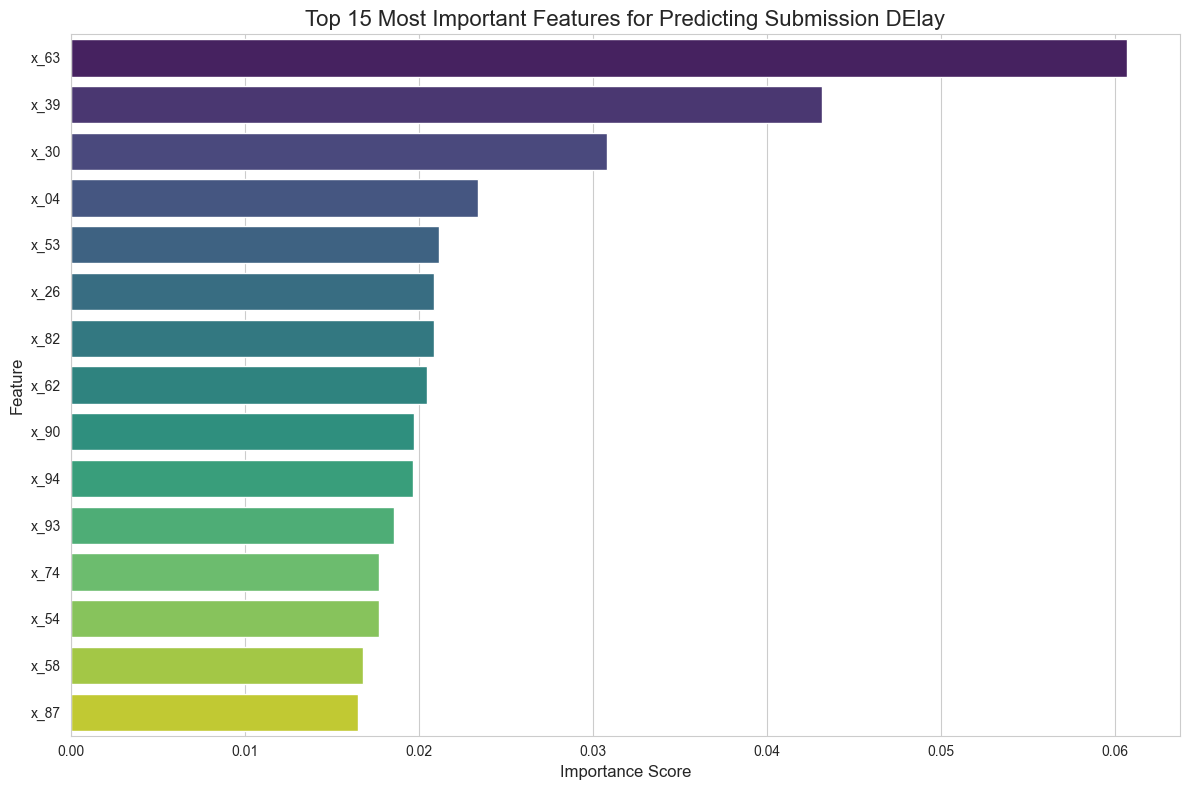

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
file_name = 'data-v5-2025-09-19.csv'
words_column_name = 'Submission_Delay'
# ---

try:
    # Load the dataset and drop any rows with missing word counts
    df = pd.read_csv(file_name).dropna(subset=[words_column_name])

    # Define our features (X) and target (y)
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    X = df[feature_columns]
    y = df[words_column_name]

    # --- Train the Random Forest Model ---
    # n_estimators is the number of trees in the forest
    # random_state ensures the result is reproducible
    print("Training the Random Forest model...")
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y)

    # --- Extract and Visualize Feature Importances ---
    importances = model.feature_importances_
    
    # Create a DataFrame for easier visualization
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    # Plot the top 15 most important features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')
    
    plt.title('Top 15 Most Important Features for Predicting Submission DElay', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

except (FileNotFoundError, KeyError) as e:
    print(f"An error occurred: {e}")
    print("\nPlease make sure the file name and column names are spelled correctly.")

## Analysis
The most significant feature for the total number of characters is the x_78 feature but it only contributes roughly 2.7% which is again not a lot. So similar to the total number of words, it is safe to say that the the resposibility of character counts is highly distributed amoungst all features. 

Surprisngly for Submission Delay, the x_63 has an importance score of 0.06 which means its responsible for 6% of the varaition in this particular variable which is significantly more than the what scores we have seen so far. This means that the featrure x_63 is somehow related to the sumbission delay.

### Next step
I am again curious to see if the number of characters per word that is the word length is dependant on some feature. So i will run the same model again but on this target variable instead. 

Training the Random Forest model...


C:\Users\Radhika Agarwal\AppData\Local\Temp\ipykernel_10840\1534479798.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='plasma')


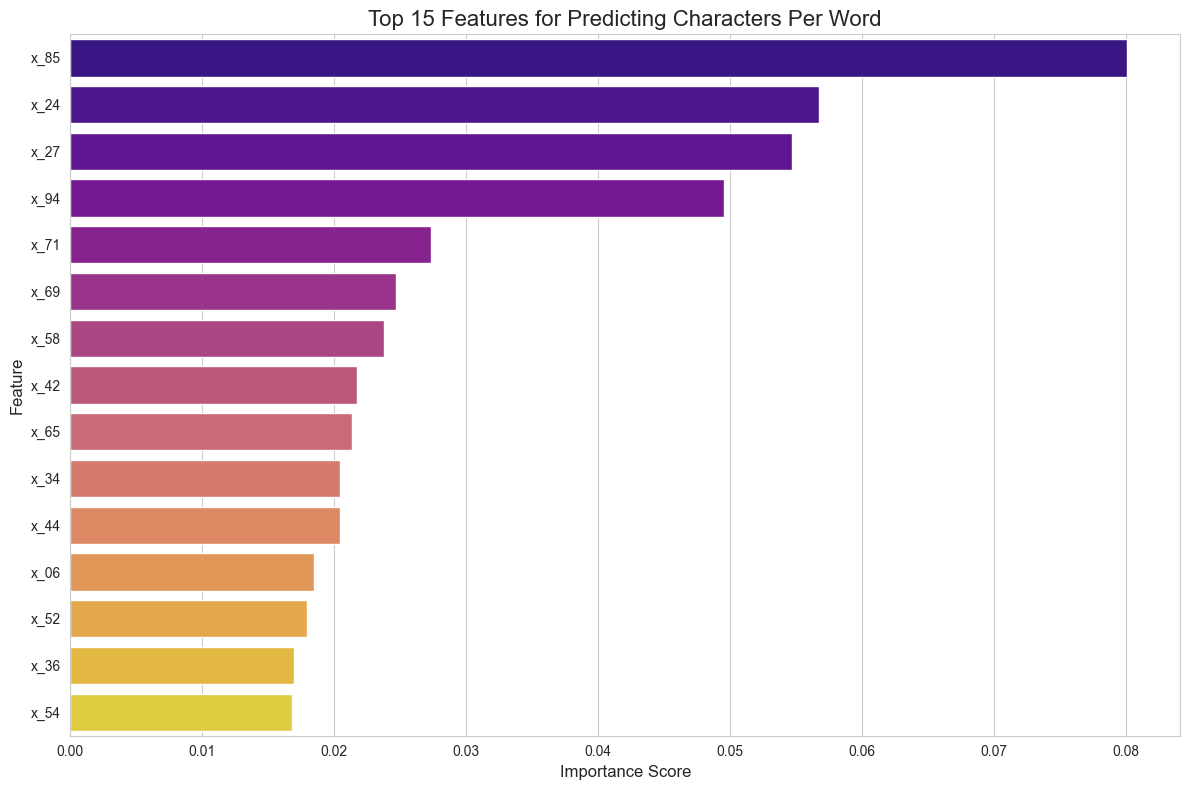

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

file_name = 'data-v5-2025-09-19.csv'

words_column_name = 'Total_Words'
total_chars_column_name = 'Total_Characters'
# ---

try:
    # Load the dataset
    df = pd.read_csv(file_name)

    if not all(col in df.columns for col in [words_column_name, total_chars_column_name]):
        raise KeyError("One or both required columns were not found in the file.")
    
    # Calculate the new metric, handling potential division by zero
    df['chars_per_word'] = df[total_chars_column_name] / df[words_column_name]
    df.dropna(subset=['chars_per_word'], inplace=True) # Drop rows where calculation failed

    # --- Step 2: Run the Random Forest Model ---
    # Define our features (X) and new target (y)
    feature_columns = [col for col in df.columns if col.startswith('x_')]
    X = df[feature_columns]
    y = df['chars_per_word']

    print("Training the Random Forest model...")
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y)

    # --- Step 3: Extract and Visualize Feature Importances ---
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='plasma')
    
    plt.title('Top 15 Features for Predicting Characters Per Word', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

except (FileNotFoundError, KeyError) as e:
    print(f"An error occurred: {e}")
    print("\nPlease make sure the file name and column names are spelled correctly.")

## Analysis
This has been a more promising model result since the feature x_85 seems to hold a 8% contribution to the total number of characters per word. Unlike the other two varailes independantly. this result suggests that the average word length is more heavily influenced by a more identifiable set of features. It is a much stronger predictive signal for word length and i think i have finnaly found one importantn result.